Total characters: 143222
Sample text:
 *** start of the project gutenberg ebook 11 *** [illustration] alice’s adventures in wonderland by lewis carroll the millennium fulcrum edition 3.0 contents chapter i. down the rabbit-hole chapter ii. the pool of tears chapter iii. a caucus-race and a long tale chapter iv. the rabbit sends in a little bill chapter v. advice from a caterpillar chapter vi. pig and pepper chapter vii. a mad tea-party chapter viii. the queen’s croquet-ground chapter ix. the mock turtle’s story chapter x. the lobster ...
Total unique words: 3067
Number of sequences: 27755
Predictors shape: (27755, 10)
Labels shape: (27755, 3067)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 27s 29ms/step - accuracy: 0.0543 - loss: 6.5712
Epoch 2/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.0809 - loss: 5.8588
Epoch 3/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 41s 29ms/step - accuracy: 0.1086 - loss: 5.4685
Epoch 4/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.1360 - loss: 5.1180
Epoch 5/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.1631 - loss: 4.7639
Epoch 6/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.1753 - loss: 4.5228
Epoch 7/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.1948 - loss: 4.2477
Epoch 8/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 24s 28ms/step - accuracy: 0.2113 - loss: 4.0184
Epoch 9/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 25s 29ms/step - accuracy: 0.2311 - loss: 3.7860
Epoch 10/10
868/868 ━━━━━━━━━━━━━━━━━━━━ 22s 26ms/step - accuracy: 0.2554 - loss: 3.5801


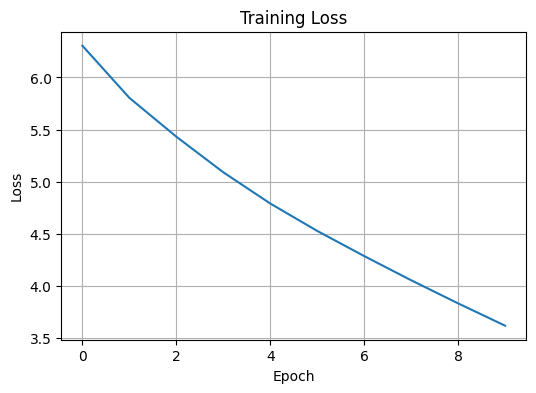

=== Generated Text ===
alice was beginning to feel very tired of their mouth and it was beginning to sea just into a well—” or two she began to fancy the dormouse sitting on the white rabbit who was the answer

=== Story Intro (Content Creation Demo) ===
once upon a time in a strange land of talking rabbits  you are your side of her time i see when i mean you’d then ferrets any a queer little feet by a or book i i think it grow on four roses oh ” “i not are help i better no like you ” and that she tried on such


In [2]:

# 1. IMPORTS

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.optimizers import Adam

import numpy as np
import matplotlib.pyplot as plt
import os, io, re, string

# 2. DATASET PREPARATION (PROJECT GUTENBERG: Alice in Wonderland)

# Download a public-domain text from Project Gutenberg
# (You can replace this URL with any other public text)
url = "https://www.gutenberg.org/files/11/11-0.txt"
file_path = tf.keras.utils.get_file("alice_in_wonderland.txt", origin=url)

# Read text
with io.open(file_path, 'r', encoding='utf-8') as f:
    text = f.read()

# Basic cleaning: lowercasing, remove extra spaces
text = text.lower()
text = re.sub(r'\s+', ' ', text)  # collapse whitespace

print("Total characters:", len(text))
print("Sample text:\n", text[:500], "...")

# 3. TOKENIZATION & SEQUENCE CREATION (WORD-LEVEL)

# Tokenize words
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

total_words = len(tokenizer.word_index) + 1
print("Total unique words:", total_words)

# Convert entire text to a sequence of word indices
token_list = tokenizer.texts_to_sequences([text])[0]

# Create input sequences (n-grams)
# Example: "alice was beginning to" -> [alice, was, beginning] => input,
#                                          "to"                => label
input_sequences = []
sequence_length = 10  # you can tune this (10-20 is typical for a small demo)

for i in range(sequence_length, len(token_list)):
    n_gram_sequence = token_list[i-sequence_length:i+1]  # 10 words + 1 label
    input_sequences.append(n_gram_sequence)

print("Number of sequences:", len(input_sequences))

# Convert to numpy array
input_sequences = np.array(input_sequences)

# Split into predictors (X) and label (y)
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

# Convert labels to one-hot
y = tf.keras.utils.to_categorical(y, num_classes=total_words)

print("Predictors shape:", X.shape)
print("Labels shape:", y.shape)

# Max sequence length for padding during generation
max_seq_len = X.shape[1]

# 4. BUILD A SIMPLE TEXT GENERATION MODEL (LSTM)
embedding_dim = 64
lstm_units = 128

model = Sequential()
model.add(Embedding(input_dim=total_words,
                    output_dim=embedding_dim,
                    input_length=max_seq_len))
model.add(LSTM(lstm_units))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.summary()

# 5. TRAIN THE MODEL

# NOTE: For Colab, you can start with few epochs (e.g., 10).
# Increase if you want better quality text but it will take longer.
epochs = 10

history = model.fit(X, y, epochs=epochs, verbose=1)

# 6. VISUALIZE TRAINING LOSS (OPTIONAL FOR REPORT)

plt.figure(figsize=(6, 4))
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# 7. TEXT GENERATION FUNCTION

def generate_text(seed_text, next_words=20, temperature=1.0):
    """
    Generate text given a seed string.
    temperature > 1.0 -> more random, < 1.0 -> more conservative.
    """
    result = seed_text

    for _ in range(next_words):
        # Tokenize current seed
        token_list = tokenizer.texts_to_sequences([result])[0]
        # Keep only the last max_seq_len tokens
        token_list = token_list[-max_seq_len:]
        # Pad if shorter
        padded = pad_sequences([token_list], maxlen=max_seq_len, padding='pre')

        # Predict probability distribution over next word
        preds = model.predict(padded, verbose=0)[0]

        # Apply temperature
        preds = np.asarray(preds).astype('float64')
        preds = np.log(preds + 1e-9) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)

        # Sample from the probability distribution
        next_index = np.random.choice(range(total_words), p=preds)
        # Map index back to word
        for word, index in tokenizer.word_index.items():
            if index == next_index:
                next_word = word
                break

        # Append to result
        result += " " + next_word

    return result

# 8. BASIC DEMO: FREE TEXT GENERATION FROM A SEED

seed = "alice was beginning to feel very tired"
generated = generate_text(seed, next_words=30, temperature=0.8)
print("=== Generated Text ===")
print(generated)

# 9. APPLICATION DEMO: SIMPLE CONTENT CREATION
#    (e.g., drafting a whimsical story intro)

def generate_story_intro(topic, length=40):
    """
    Simple "content creation" application: given a topic prompt, generate
    a whimsical story-style introduction.
    """
    base_prompt = f"once upon a time {topic} "
    story_text = generate_text(base_prompt, next_words=length, temperature=0.9)
    return story_text

topic_prompt = "in a strange land of talking rabbits"
story_intro = generate_story_intro(topic_prompt, length=50)

print("\n=== Story Intro (Content Creation Demo) ===")
print(story_intro)

